In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import pandas as pd
from tqdm.notebook import tqdm


In [2]:
bdt_vars = [
    "nc_delta_score",
    "nc_pio_score",
    #"numu_score",
    "numu_cc_flag",
]

kine_scalar_vars = [
    #"kine_reco_add_energy",
    #"kine_pio_mass",
    #"kine_pio_flag",
    #"kine_pio_vtx_dis",
    "kine_pio_energy_1",
    #"kine_pio_theta_1",
    #"kine_pio_phi_1",
    #"kine_pio_dis_1",
    "kine_pio_energy_2",
    #"kine_pio_theta_2",
    #"kine_pio_phi_2",
    #"kine_pio_dis_2",
    "kine_pio_angle"
]

kine_vector_vars = [
    "kine_energy_particle",
    "kine_energy_info",
    "kine_particle_type",
    "kine_energy_included",
]

eval_mc_variables = [
    "run",
    "subrun",
    "event",
    #"flash_time",
    "weight_spline", # this and remaining only make sense for MC
    "weight_cv",
    #"match_completeness_energy",
    #"truth_nuEnergy",
    #"truth_energyInside",
    #"truth_electronInside",
    #"truth_nuPdg",
    #"truth_isCC",
    #"truth_isFC",
    #"truth_vtxInside",
    #"truth_nuTime",

    #"flash_measPe", 
    #"flash_predPe",
    #"match_completeness",
    #"match_purity",
    #"match_purity_xz",
    #"match_purity_xy",
]

eval_data_variables = [
    "run",
    "subrun",
    "event",
    #"flash_time",

    #"flash_measPe", 
    #"flash_predPe",
]


pf_eval_mc_variables = [
    #"truth_NprimPio",
    #"truth_NCDelta",
    #"nuvtx_diff",
    #"showervtx_diff",
    #"reco_showerKE",
    #"truth_pio_energy_1",
    #"truth_pio_energy_2",
    #"truth_vtxX",
    #"truth_vtxY",
    #"truth_vtxZ",
    #"truth_corr_nuvtxX",
    #"truth_corr_nuvtxY",
    #"truth_corr_nuvtxZ",
    #"reco_nuvtxX",
    #"reco_nuvtxY",
    #"reco_nuvtxZ",
    #"reco_showervtxX",
    #"reco_showervtxY",
    #"reco_showervtxZ",
    "truth_pdg",
    "truth_mother",
    "truth_startMomentum",
    #"truth_startXYZT",
    "truth_id",
    #"truth_process",
    #"reco_showerMomentum",
    #"reco_muonMomentum",
    #"truth_muonMomentum",
    #"truth_showerMomentum", # missing for Pawel's files
]

pf_eval_data_variables = [
    #"reco_showerKE",
    #"reco_nuvtxX",
    #"reco_nuvtxY",
    #"reco_nuvtxZ",
    #"reco_showervtxX",
    #"reco_showervtxY",
    #"reco_showervtxZ",
    #"reco_showerMomentum",
    #"reco_muonMomentum",
]



In [3]:
# change from uproot3 style to uproot4 style

nc_pi0_sel_query = "numu_cc_flag >= 0 and nc_pio_score > 1.816 and kine_pio_energy_1 > 0. and kine_pio_energy_2 > 0."

f = uproot.open("/home/lee/hd1/glee_added_rootfiles/checkout_prodgenie_bnb_nc_delta_overlay_run1_PF.root")["wcpselection"]
f_bdt = f["T_BDTvars"].arrays(bdt_vars, library="pd")
f_eval = f["T_eval"].arrays(eval_mc_variables + ["match_isFC"], library="pd")
f_pfeval = f["T_PFeval"].arrays(pf_eval_mc_variables, library="pd")
f_kine = f["T_KINEvars"].arrays(kine_scalar_vars + kine_vector_vars + ["kine_reco_Enu"], library="pd")
f_pot = f["T_pot"].arrays("pot_tor875good", library="pd")
nc_delta_overlay_run1_POT = np.sum(f_pot["pot_tor875good"].to_numpy())
nc_delta_overlay_run1_df = pd.concat([f_bdt, f_eval, f_pfeval, f_kine], axis=1, sort=False)
nc_delta_overlay_run1_df["run_num"] = 1
nc_delta_overlay_run1_df = nc_delta_overlay_run1_df.query(nc_pi0_sel_query)
print("done with run 1", nc_delta_overlay_run1_df.shape)

f = uproot.open("/home/lee/hd1/glee_added_rootfiles/checkout_prodgenie_bnb_nc_delta_overlay_run2_PF.root")["wcpselection"]
f_bdt = f["T_BDTvars"].arrays(bdt_vars, library="pd")
f_eval = f["T_eval"].arrays(eval_mc_variables + ["match_isFC"], library="pd")
f_pfeval = f["T_PFeval"].arrays(pf_eval_mc_variables, library="pd")
f_kine = f["T_KINEvars"].arrays(kine_scalar_vars + kine_vector_vars + ["kine_reco_Enu"], library="pd")
f_pot = f["T_pot"].arrays("pot_tor875good", library="pd")
nc_delta_overlay_run2_POT = np.sum(f_pot["pot_tor875good"].to_numpy())
nc_delta_overlay_run2_df = pd.concat([f_bdt, f_eval, f_pfeval, f_kine], axis=1, sort=False)
nc_delta_overlay_run2_df["run_num"] = 2
nc_delta_overlay_run2_df = nc_delta_overlay_run2_df.query(nc_pi0_sel_query)
print("done with run 2", nc_delta_overlay_run2_df.shape)

f = uproot.open("/home/lee/hd1/glee_added_rootfiles/checkout_prodgenie_bnb_nc_delta_overlay_run3_PF.root")["wcpselection"]
f_bdt = f["T_BDTvars"].arrays(bdt_vars, library="pd")
f_eval = f["T_eval"].arrays(eval_mc_variables + ["match_isFC"], library="pd")
f_pfeval = f["T_PFeval"].arrays(pf_eval_mc_variables, library="pd")
f_kine = f["T_KINEvars"].arrays(kine_scalar_vars + kine_vector_vars + ["kine_reco_Enu"], library="pd")
f_pot = f["T_pot"].arrays("pot_tor875good", library="pd")
nc_delta_overlay_run3_POT = np.sum(f_pot["pot_tor875good"].to_numpy())
nc_delta_overlay_run3_df = pd.concat([f_bdt, f_eval, f_pfeval, f_kine], axis=1, sort=False)
nc_delta_overlay_run3_df["run_num"] = 3
nc_delta_overlay_run3_df = nc_delta_overlay_run3_df.query(nc_pi0_sel_query)
print("done with run 3", nc_delta_overlay_run3_df.shape)


KeyInFileError: not found: 'T_BDTvars' (with any cycle number)

    Available keys: 'T_BDTvars_cv;4', 'T_BDTvars_cv;3', 'T_BDTvars_det;4', 'T_BDTvars_det;3', 'T_pot_cv;1', 'T_eval_cv;2', 'T_eval_cv;1', 'T_KINEvars_cv;1', 'T_eval_det;2', 'T_eval_det;1', 'T_pot_det;1', 'T_KINEvars_det;1'...

in file /home/lee/hd1/glee_added_rootfiles/glee_added_hist_rootfiles/DetVar/WCPcheckout_prodgenie_bnb_nu_overlay_WCP_DetVar_LYAttenuation_run1_disabled.root

In [ ]:
nc_delta_overlay_reco_NC_pi0_df = pd.concat([nc_delta_overlay_run1_df, nc_delta_overlay_run2_df, nc_delta_overlay_run3_df], axis=0, sort=False)


In [ ]:
true_nums_prim_protons_35 = []
max_true_prim_proton_energies = []

truth_ids = nc_delta_overlay_reco_NC_pi0_df["truth_id"].to_numpy()
truth_pdgs = nc_delta_overlay_reco_NC_pi0_df["truth_pdg"].to_numpy()
truth_mothers = nc_delta_overlay_reco_NC_pi0_df["truth_mother"].to_numpy()
truth_startMomentums = nc_delta_overlay_reco_NC_pi0_df["truth_startMomentum"].to_numpy()

for i in range(nc_delta_overlay_reco_NC_pi0_df.shape[0]):

    true_num_prim_protons_35 = 0

    truth_id_list = truth_ids[i]
    truth_pdg_list = truth_pdgs[i]
    truth_mother_list = truth_mothers[i]
    truth_startMomentum_list = truth_startMomentums[i]

    num_particles = len(truth_id_list)


    for j in range(len(truth_pdg_list)):

        if truth_mother_list[j] == 0 and truth_pdg_list[j] == 2212: # primary proton
            if truth_startMomentum_list[j][3] * 1000. - 938.272088 > 35.:
                true_num_prim_protons_35 += 1

    true_nums_prim_protons_35.append(true_num_prim_protons_35)

nc_delta_overlay_reco_NC_pi0_df["true_num_prim_protons_35"] = true_nums_prim_protons_35


In [ ]:
proton_nums = []
track_nums = []
max_proton_energies = []
max_track_energies = []
energy_lists = nc_delta_overlay_reco_NC_pi0_df["kine_energy_particle"].to_numpy()
pdg_lists = nc_delta_overlay_reco_NC_pi0_df["kine_particle_type"].to_numpy()
for i in range(nc_delta_overlay_reco_NC_pi0_df.shape[0]):
    max_proton_energy = -1
    max_track_energy = -1
    proton_num = 0
    track_num = 0
    energy_list = energy_lists[i]
    pdg_list = pdg_lists[i]
    for i in range(len(energy_list)):
        if abs(pdg_list[i]) == 2212:
            max_proton_energy = max(max_proton_energy, energy_list[i])
            if energy_list[i] > 35:
                proton_num += 1
        if abs(pdg_list[i]) == 13 or abs(pdg_list[i]) == 211: # see N_tracks at https://github.com/BNLIF/wcp-uboone-bdt/blob/main/inc/WCPleeANA/cuts.h
            max_track_energy = max(max_track_energy, energy_list[i])
            if energy_list[i] > 10.:
                track_num += 1
    proton_nums.append(proton_num)
    track_nums.append(track_num)
    max_proton_energies.append(max_proton_energy)
    max_track_energies.append(max_track_energy)
nc_delta_overlay_reco_NC_pi0_df["WC_reco_num_protons"] = proton_nums
nc_delta_overlay_reco_NC_pi0_df["WC_reco_num_other_tracks"] = track_nums
nc_delta_overlay_reco_NC_pi0_df["WC_reco_max_proton_energy"] = max_proton_energies
nc_delta_overlay_reco_NC_pi0_df["WC_reco_max_other_tracks_energy"] = max_track_energies


In [ ]:
normalizing_POT_run1 = 1.42549e+20
normalizing_POT_run2 = 2.54086e+20
normalizing_POT_run3 = 2.37673e+20

# ext POT isn't saved correctly in the files
ext_run1_POT = 6.67349e+19
ext_run2_POT = 3.60832e+20
ext_run3_POT = 5.19263e+20

weight_cv = nc_delta_overlay_reco_NC_pi0_df["weight_cv"].to_numpy()
weight_spline = nc_delta_overlay_reco_NC_pi0_df["weight_spline"].to_numpy()

run_nums = nc_delta_overlay_reco_NC_pi0_df["run_num"].to_numpy()
net_weights = []
for i in range(len(weight_cv)):
    weight_temp = weight_cv[i] * weight_spline[i]
    if weight_temp <= 0. or weight_temp > 30. or np.isnan(weight_temp): # something went wrong with the saved weights
        weight_temp = 1.

    if run_nums[i] == 1:
        net_weights.append(normalizing_POT_run1 / nc_delta_overlay_run1_POT)
    elif run_nums[i] == 2:
        net_weights.append(normalizing_POT_run2 / nc_delta_overlay_run2_POT)
    elif run_nums[i] == 3:
        net_weights.append(normalizing_POT_run3 / nc_delta_overlay_run3_POT)

nc_delta_overlay_reco_NC_pi0_df["net_weight"] = net_weights


In [ ]:
nc_delta_overlay_true_Np_reco_NC_pi0_df = nc_delta_overlay_reco_NC_pi0_df.query("true_num_prim_protons_35 > 0")
nc_delta_overlay_true_Np_reco_NC_pi0_Np_df = nc_delta_overlay_true_Np_reco_NC_pi0_df.query("WC_reco_num_protons > 0")


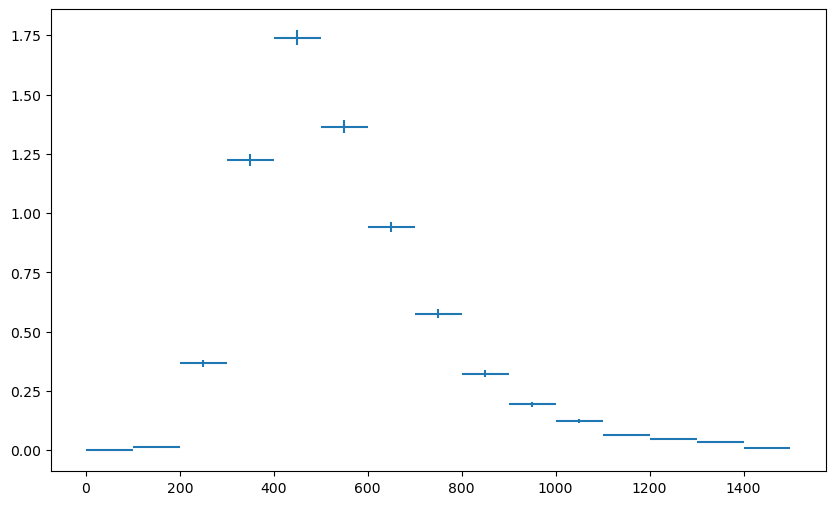

In [ ]:
bins = np.linspace(0, 1500, 16)
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_width = bins[1] - bins[0]

plt.figure(figsize=(10,6))

counts = np.histogram(nc_delta_overlay_true_Np_reco_NC_pi0_Np_df["kine_reco_Enu"], bins=bins, weights=nc_delta_overlay_true_Np_reco_NC_pi0_Np_df["net_weight"])[0]
errors = np.sqrt(np.histogram(nc_delta_overlay_true_Np_reco_NC_pi0_Np_df["kine_reco_Enu"], bins=bins, weights=nc_delta_overlay_true_Np_reco_NC_pi0_Np_df["net_weight"]**2)[0])

# no connecting lines
plt.errorbar(bin_centers, counts, yerr=errors, xerr=bin_width/2, fmt='o', markersize=0)

plt.show()
